## Import Libraries, and Define Paths and Interables

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from modules.utils import load_object, load_dataset, load_all_datasets, load_all_models
from modules.analysis import (
    generate_crossval_statistics,
    generate_test_statistics,
    dataset_model_slice,
    compare_feature_importances_for_dataset,
    extract_indices
)

In [2]:
full_dir = '../data/processed'
reduced_dir = '../data/reduced'
other_dir = '../data/other-feature-selection'
models_dir = '../models'
metrics_dir = '../metrics'
shap_dir = '../shap-explanations'
plot_dir = '../visualizations'
model_types = ['logreg', 'dt', 'rf', 'xgb', 'svc']
fs_types = ['mrmr', 'mutual_info', 'relieff']
dataset_names = sorted(os.listdir(models_dir))

## Load Datasets and Models

In [ ]:
# Load datasets
train_sets, test_sets = load_all_datasets(
    dataset_names = dataset_names,
    model_types = model_types,
    fs_types = fs_types,
    full_dir = full_dir,
    reduced_dir = reduced_dir,
    other_dir = other_dir,
    train = True,
    test = False
)

In [ ]:
# Load models
models = load_all_models(
    dataset_names = dataset_names,
    model_types = model_types,
    models_dir = models_dir
)

## Generate Model Statistics

In [ ]:
# Generate cross-validation statistics for further analysis
crossval_stats = generate_crossval_statistics(
    models = models,
    train_sets = train_sets,
    n_splits = 5, # 5-fold cross validation
    random_state = 42,
    metrics_dir = metrics_dir
)

In [ ]:
# Generate test set statistics for final model performance evaluation
test_stats = generate_test_statistics(
    model = models,
    test_sets = test_sets,
    metrics_dir = metrics_dir
)

## Select Best Techniques Per Dataset / Model

In [3]:
cv_stats = pd.read_csv('../metrics/crossval_statistics.csv')
test_stats = pd.read_csv('../metrics/test_statistics.csv')

### Kaggle Credit Card Fraud

### Kaggle Patient Survival

### UCI Android Permissions

### UCI Breast Cancer

### UCI Heart Disease

### UCI Indian Liver

### UCI Mushroom

### UCI Phishing URL

### UCI Secondary Mushroom

### UCI Spect Heart

In [4]:
dataset = 'uci_spect_heart'
best_idx = []

[INFO] Figure saved to ../visualizations/uci_spect_heart_logreg_feature_performance.png
[INFO] Figure saved to ../visualizations/uci_spect_heart_dt_feature_performance.png
[INFO] Figure saved to ../visualizations/uci_spect_heart_rf_feature_performance.png
[INFO] Figure saved to ../visualizations/uci_spect_heart_xgb_feature_performance.png
[INFO] Figure saved to ../visualizations/uci_spect_heart_svc_feature_performance.png


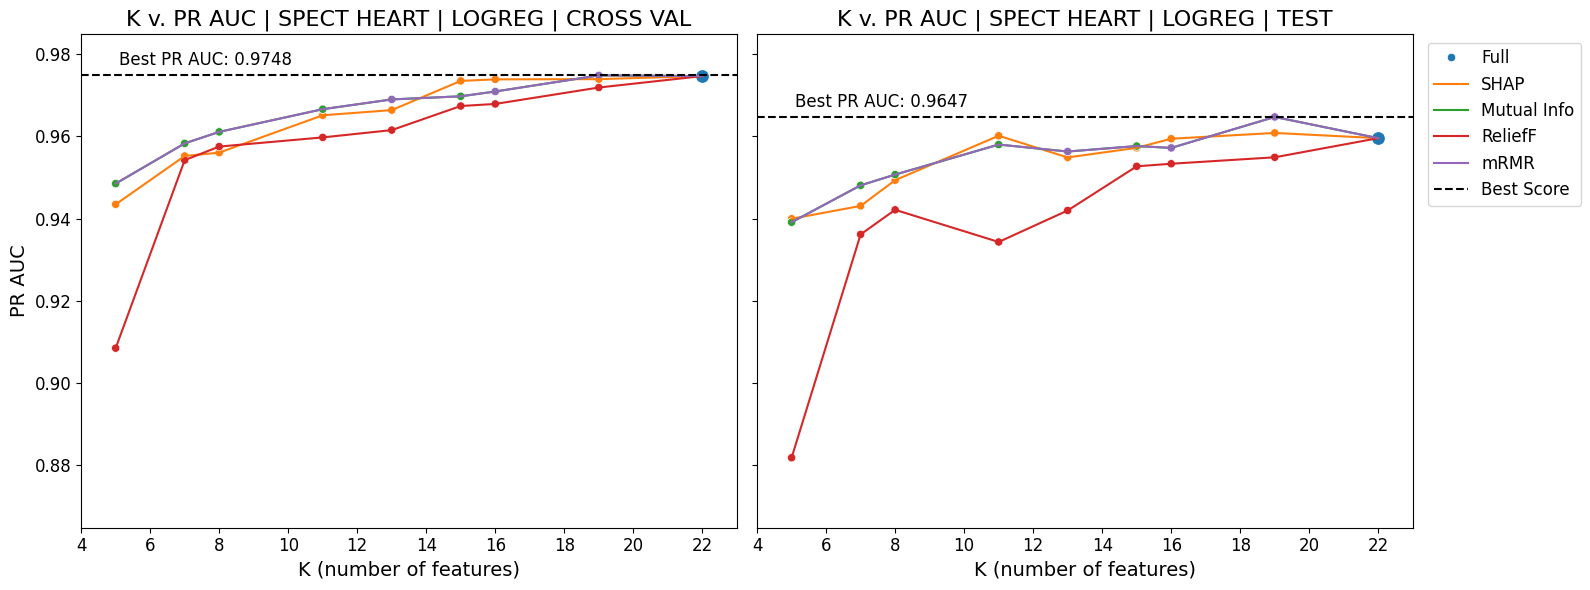

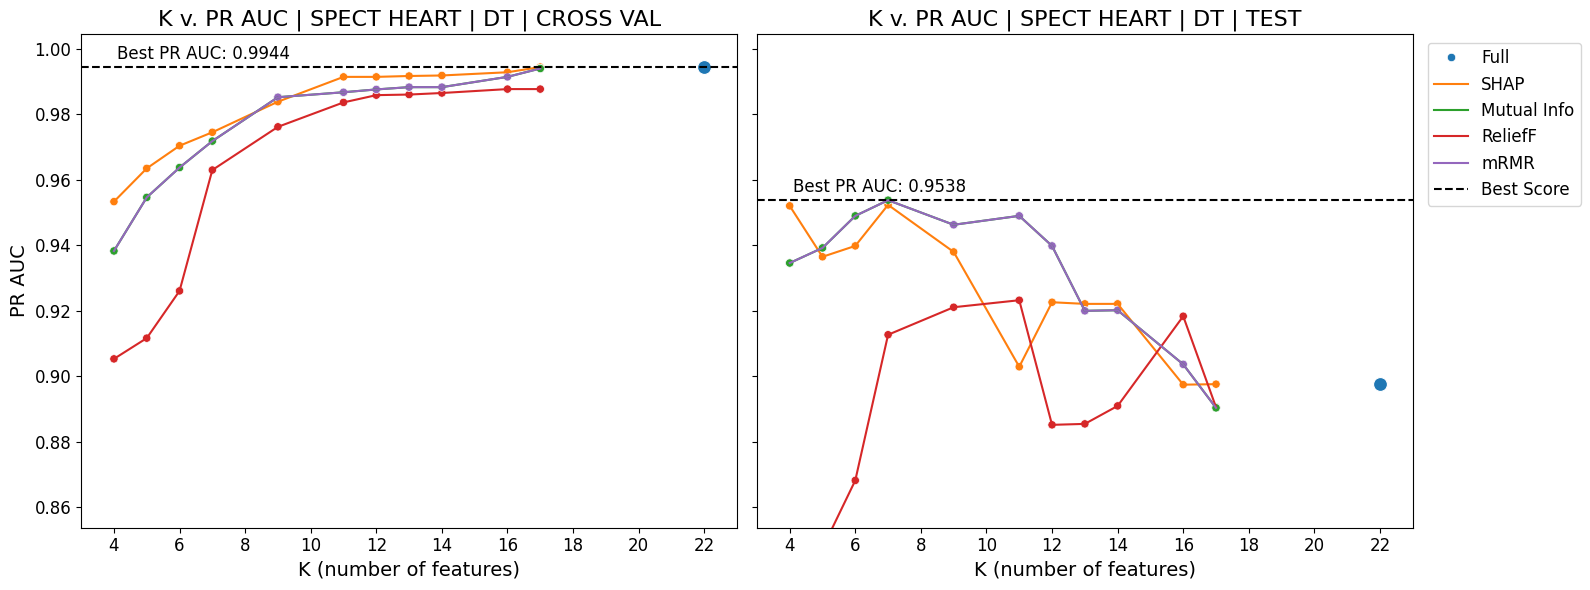

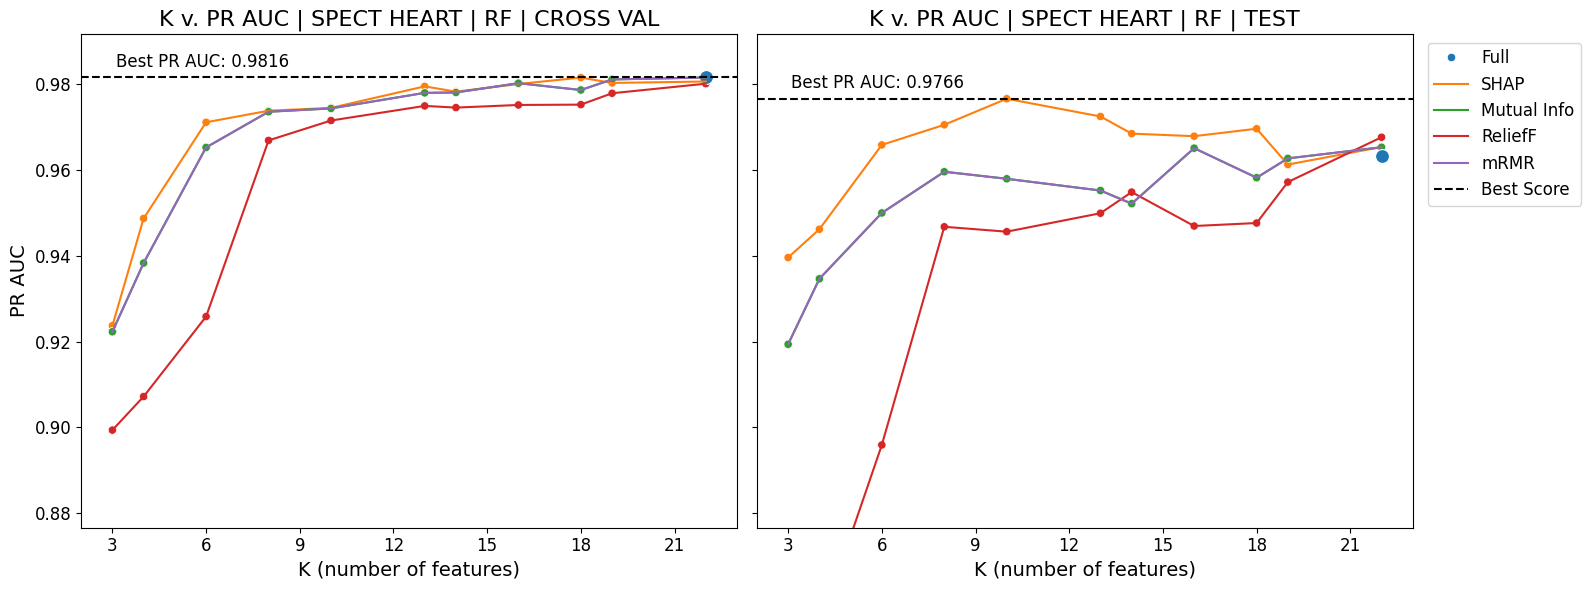

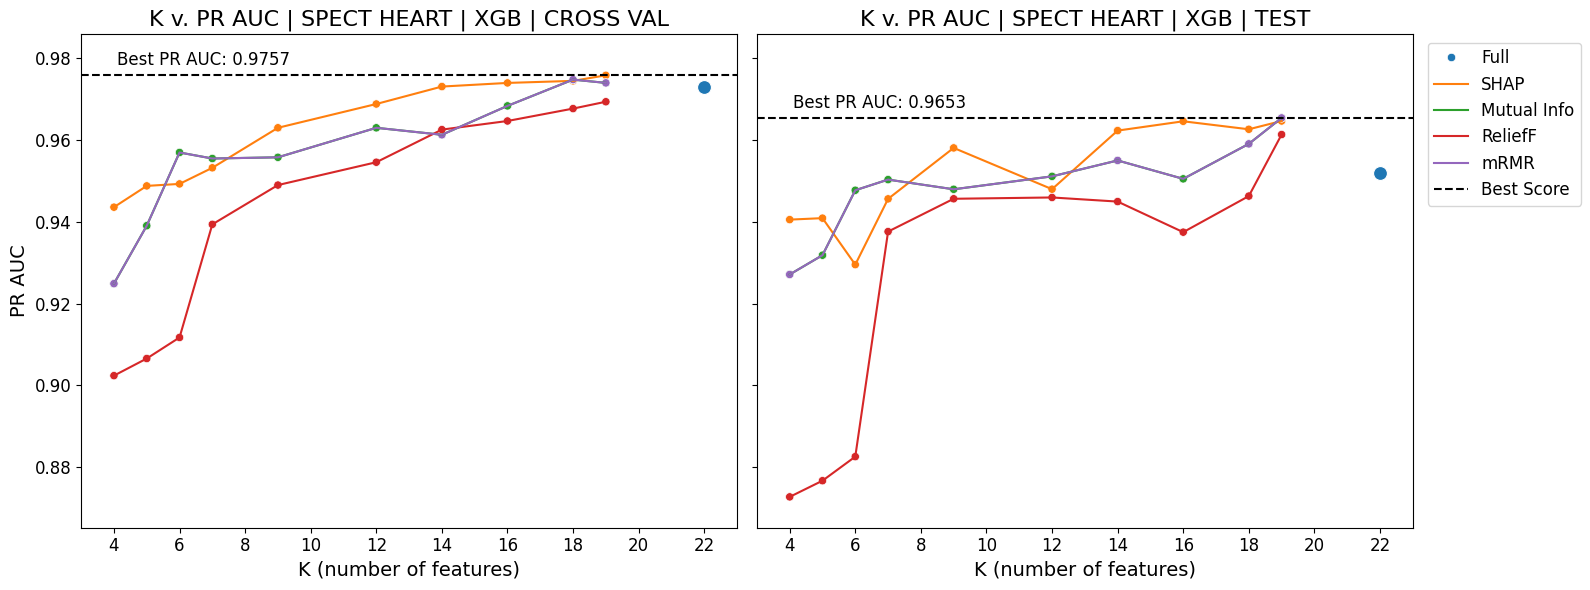

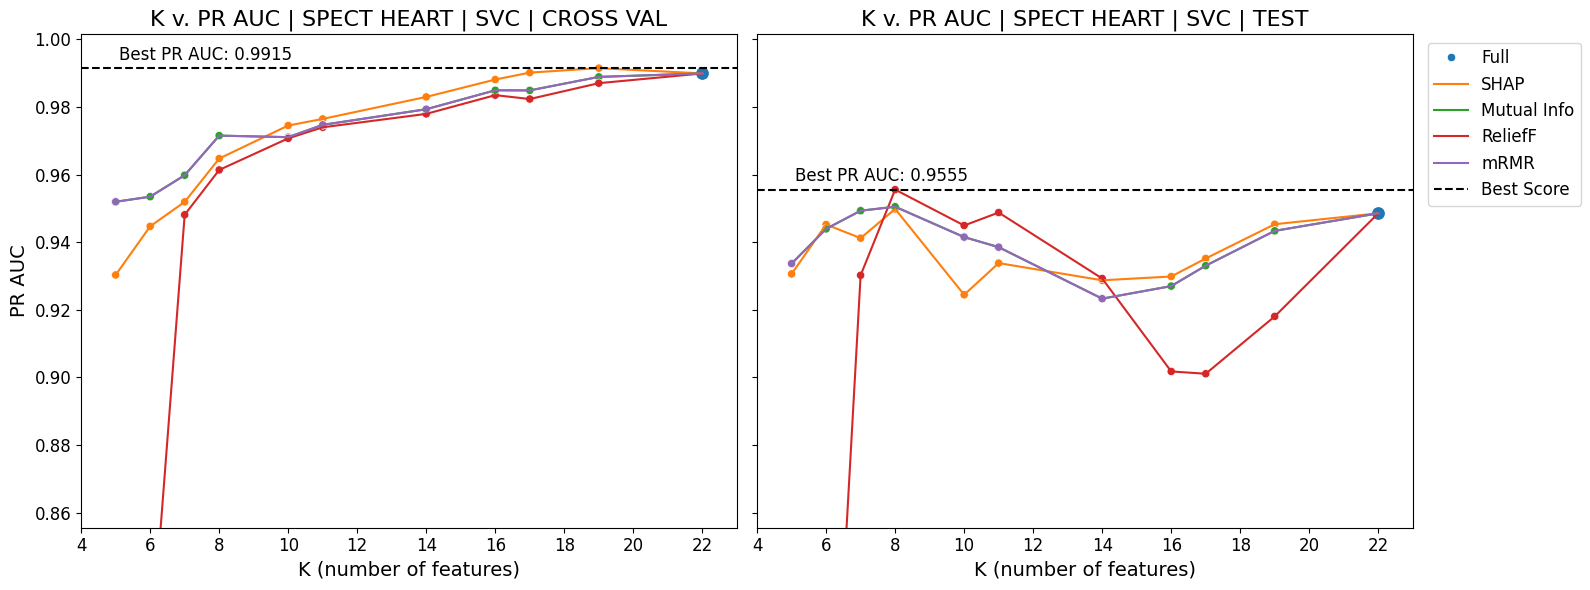

In [5]:
# Suppress interactive plotting for cell
plt.ioff()

cv_slices, test_slices, feature_performances = compare_feature_importances_for_dataset(
    cv_stats = cv_stats,
    test_stats = test_stats,
    dataset = dataset,
    model_types = model_types,
    save_dir = plot_dir
)

Selection Steps:
- Search for candidate "kinks" in model performance along CV scores where performance "flattens" to determine "best" candidates per method
- Start from least number of features, since we want to reduce features as much as possible
- Do not necessarily maximize CV PR AUC, since that prefers more features and may overfit but do not ignore CV PR AUC just to keep the lowest number of features.
- May need to choose multiple SHAP values to find one for each strategy: Max and Sum

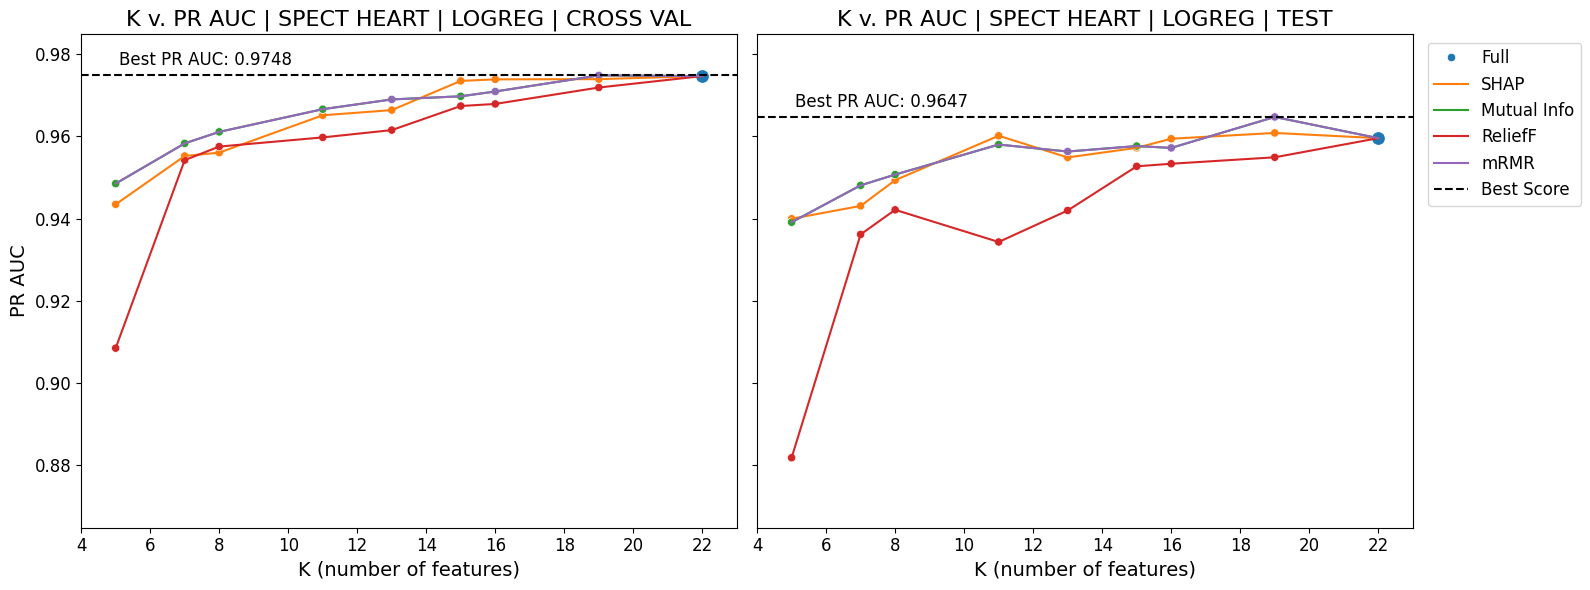

In [6]:
# SHAP goes flat at 11-13 and earlier at 7-8 but much worse performance
# Mutual/mRMR goes flat at 13
# ReliefF goes flat at 8
feature_performances[0]

In [7]:
# Sum strategy available at 11, Max strategy available at 8
cv_slices[0][cv_slices[0].k.isin([11, 13, 7, 8])]

,dataset,model,selection_type,k,pr_auc,roc_auc,recall,precision,f1,time
1822,uci_spect_heart,logreg,sum,13,0.966398,0.882250,0.929412,0.883480,0.904966,0.930259
1823,uci_spect_heart,logreg,sum,11,0.965130,0.877299,0.952941,0.875225,0.912354,0.930259
1827,uci_spect_heart,logreg,sum,8,0.956044,0.857055,0.905704,0.895448,0.899665,0.930259
1830,uci_spect_heart,logreg,sum,7,0.955221,0.855408,0.893761,0.894245,0.893164,0.930259
1832,uci_spect_heart,logreg,max,8,0.956044,0.857055,0.905704,0.895448,0.899665,0.930259
1837,uci_spect_heart,logreg,mutual_info,13,0.968991,0.891647,0.935116,0.887866,0.910626,0.026743
1841,uci_spect_heart,logreg,relieff,11,0.959746,0.866512,0.911586,0.886003,0.898291,0.013371
1843,uci_spect_heart,logreg,mrmr,8,0.961091,0.872738,0.923351,0.886817,0.904221,0.305064
1844,uci_spect_heart,logreg,mrmr,7,0.958288,0.865232,0.929234,0.882310,0.904912,0.305064
1846,uci_spect_heart,logreg,mrmr,11,0.966615,0.885902,0.934938,0.893262,0.913435,0.305064


In [8]:
# Best candidates for logreg model + full model
best_idx += test_slices[0].iloc[[0]].index.tolist()
best_idx += extract_indices(
    df = test_slices[0],
    k_values = [8, 11, 8, 13, 13]
)

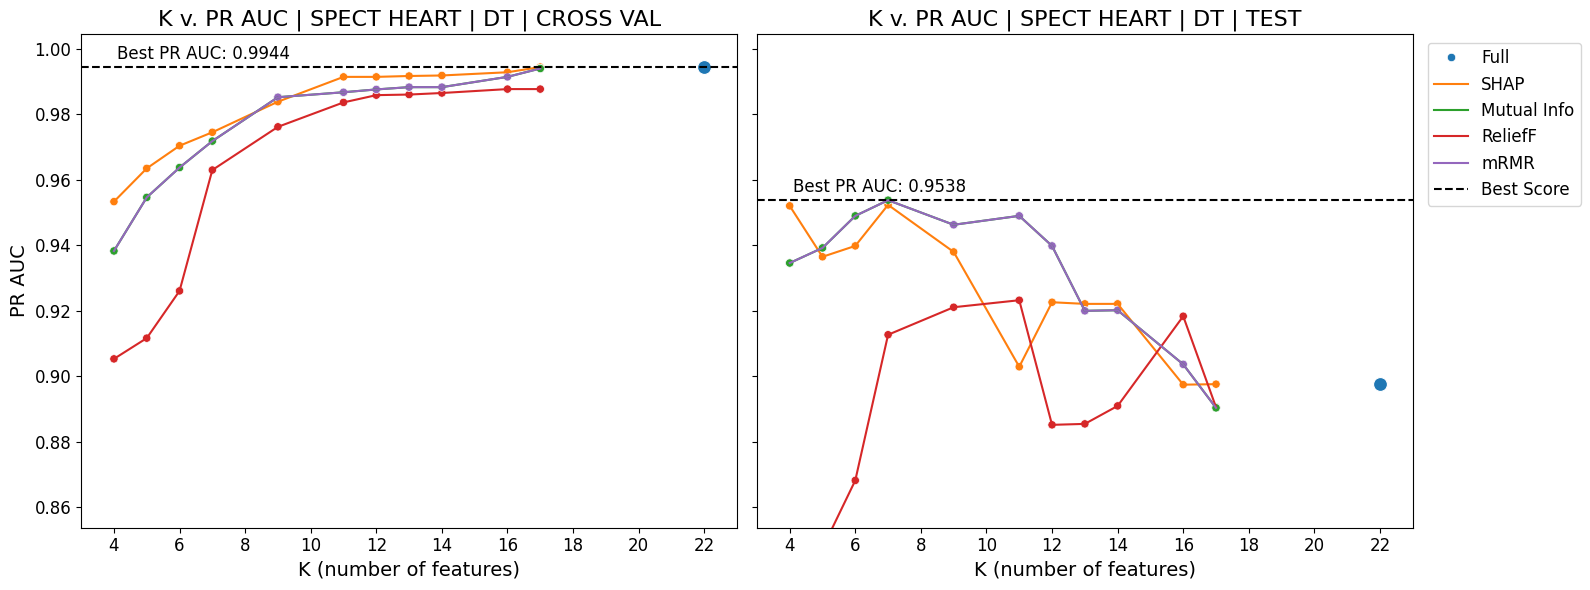

In [9]:
# SHAP goes flat at 11-15 but is probably overfitting
# SHAP is somewhat flat at 6-7 with worse performance, prefer 7 due to better performance while flat
# Mutual/mRMR goes flat at 9
# ReliefF goes flat at 11
feature_performances[1]

In [10]:
# Sum strategy available at 7, max strategy available at 12
cv_slices[1][cv_slices[1].k.isin([11, 12, 7, 6])]

,dataset,model,selection_type,k,pr_auc,roc_auc,recall,precision,f1,time
1862,uci_spect_heart,dt,sum,11,0.991444,0.973757,0.917112,0.981048,0.947966,4.625604
1868,uci_spect_heart,dt,sum,7,0.974530,0.914723,0.923351,0.903388,0.912151,4.625604
1872,uci_spect_heart,dt,sum,6,0.970420,0.903134,0.935294,0.883074,0.907939,4.625604
1873,uci_spect_heart,dt,max,12,0.991444,0.973757,0.917112,0.981048,0.947966,4.625604
1876,uci_spect_heart,dt,mutual_info,11,0.986749,0.955541,0.917291,0.946168,0.931238,0.026743
1879,uci_spect_heart,dt,mutual_info,12,0.987611,0.958868,0.923351,0.946524,0.934404,0.026743
1881,uci_spect_heart,dt,relieff,6,0.926099,0.778949,0.994118,0.796302,0.884194,0.013371
1885,uci_spect_heart,dt,mrmr,6,0.963758,0.889410,0.917469,0.896133,0.906100,0.305064
1889,uci_spect_heart,dt,relieff,11,0.983647,0.949135,0.887701,0.968145,0.926041,0.013371
1890,uci_spect_heart,dt,relieff,12,0.985866,0.956295,0.893583,0.968750,0.929491,0.013371


In [11]:
# Best candidates for dt model + full model
best_idx += test_slices[1].iloc[[0]].index.tolist()
best_idx += extract_indices(
    df = test_slices[1],
    k_values = [12, 7, 11, 9, 9]
)

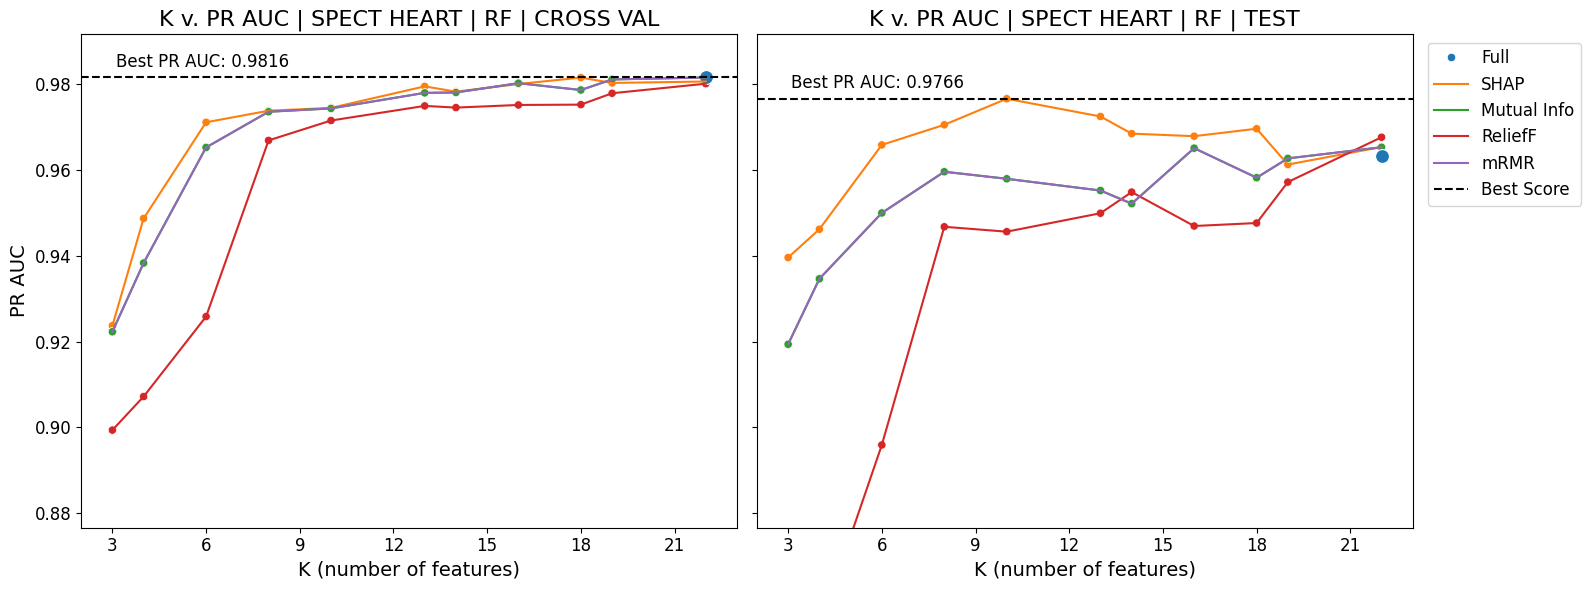

In [12]:
# SHAP has a peak at 13 and goes flat at 8-10 with worse performance (another peak at 18 but probably overfitting)
# Mutual/mRMR goes flat at 8-10 but has a peak at 16 with better performance
# ReliefF goes flat at 14-18, small peak at 13
feature_performances[2]

In [13]:
# Sum strategy available at 8, max strategy available at 13
cv_slices[2][cv_slices[2].k.isin([13, 6, 8, 10])]

,dataset,model,selection_type,k,pr_auc,roc_auc,recall,precision,f1,time
1910,uci_spect_heart,rf,sum,10,0.974455,0.905886,0.923351,0.892421,0.907132,22.065557
1912,uci_spect_heart,rf,sum,8,0.973794,0.906405,0.940998,0.878863,0.908621,22.065557
1913,uci_spect_heart,rf,max,13,0.979475,0.923758,0.929234,0.888457,0.907807,22.065557
1916,uci_spect_heart,rf,sum,6,0.971104,0.899978,0.923351,0.886508,0.904141,22.065557
1917,uci_spect_heart,rf,max,10,0.974455,0.905886,0.923351,0.892421,0.907132,22.065557
1922,uci_spect_heart,rf,mrmr,13,0.977959,0.917635,0.952941,0.880257,0.914915,0.305064
1923,uci_spect_heart,rf,mrmr,10,0.974333,0.912571,0.947059,0.884506,0.914243,0.305064
1926,uci_spect_heart,rf,mrmr,8,0.973556,0.906198,0.947059,0.879464,0.911685,0.305064
1930,uci_spect_heart,rf,mrmr,6,0.965242,0.887405,0.929234,0.882310,0.904912,0.305064
1933,uci_spect_heart,rf,mutual_info,10,0.974333,0.912571,0.947059,0.884506,0.914243,0.026743


In [14]:
# Best candidates for rf model + full model
best_idx += test_slices[2].iloc[[0]].index.tolist()
best_idx += extract_indices(
    df = test_slices[2],
    k_values = [13, 8, 13, 16, 16]
)

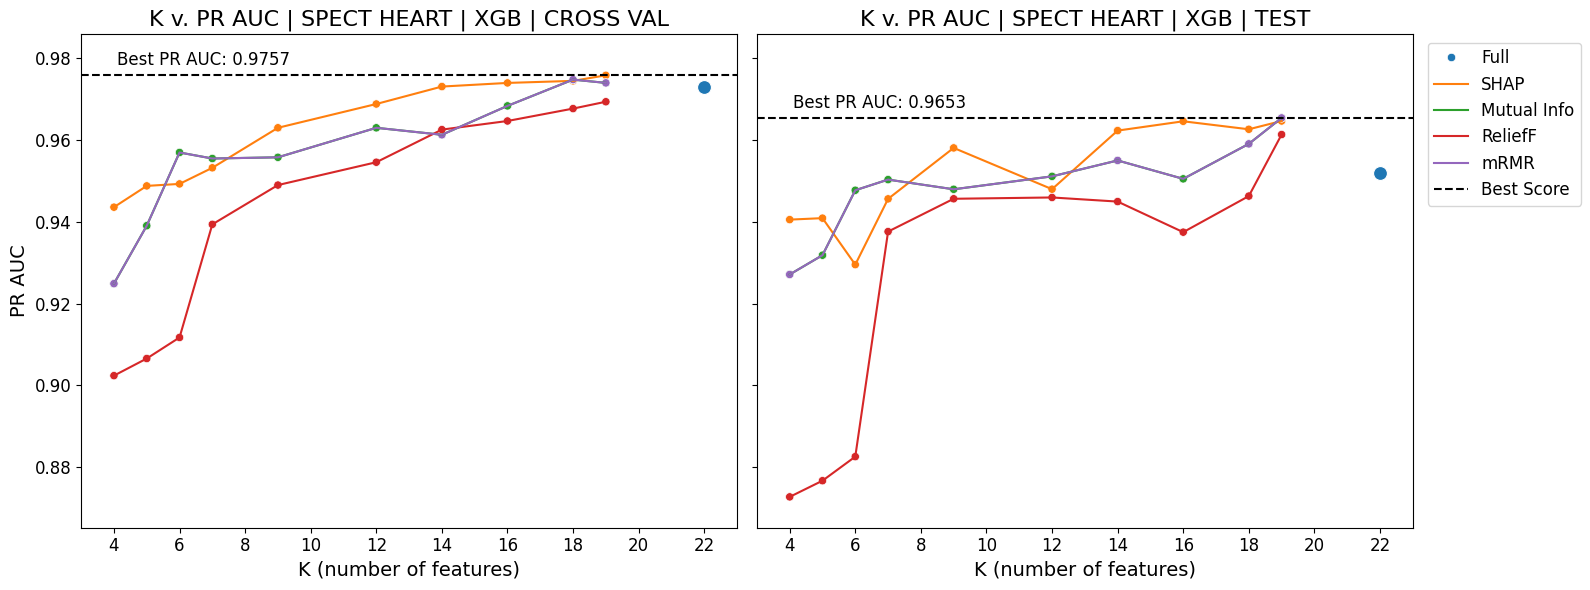

In [15]:
# SHAP goes flat at 14-16 but may be overfitting, other candidate at 9 with worse performance
# Mutual/mRMR peaks early at 6 and peaks again at slightly higher performance at 14
# ReliefF goes flat at 14-18, small peak at 14
feature_performances[3]

In [16]:
# Sum strategy available at 9 and 14, max strategy available at 9 and 14
cv_slices[3][cv_slices[3].k.isin([14, 9, 6])]

,dataset,model,selection_type,k,pr_auc,roc_auc,recall,precision,f1,time
1954,uci_spect_heart,xgb,sum,9,0.962882,0.875374,0.929412,0.888214,0.907415,9.414096
1957,uci_spect_heart,xgb,max,14,0.972945,0.897115,0.941176,0.879076,0.908718,9.414096
1958,uci_spect_heart,xgb,sum,14,0.972945,0.897115,0.941176,0.879076,0.908718,9.414096
1962,uci_spect_heart,xgb,max,9,0.962882,0.875374,0.929412,0.888214,0.907415,9.414096
1963,uci_spect_heart,xgb,max,6,0.949190,0.842688,0.881996,0.886936,0.883877,9.414096
1968,uci_spect_heart,xgb,mrmr,6,0.956857,0.863660,0.929234,0.882310,0.904912,0.305064
1973,uci_spect_heart,xgb,mrmr,9,0.955679,0.862405,0.935116,0.888720,0.910941,0.305064
1975,uci_spect_heart,xgb,mutual_info,14,0.961182,0.873757,0.940998,0.883608,0.911296,0.026743
1980,uci_spect_heart,xgb,mrmr,14,0.961182,0.873757,0.940998,0.883608,0.911296,0.305064
1982,uci_spect_heart,xgb,relieff,9,0.948908,0.843168,0.893583,0.883687,0.888478,0.013371


In [17]:
# Best candidates for xgb model + full model
best_idx += test_slices[3].iloc[[0]].index.tolist()
best_idx += extract_indices(
    df = test_slices[3],
    k_values = [14, 9, 14, 14, 14]
)

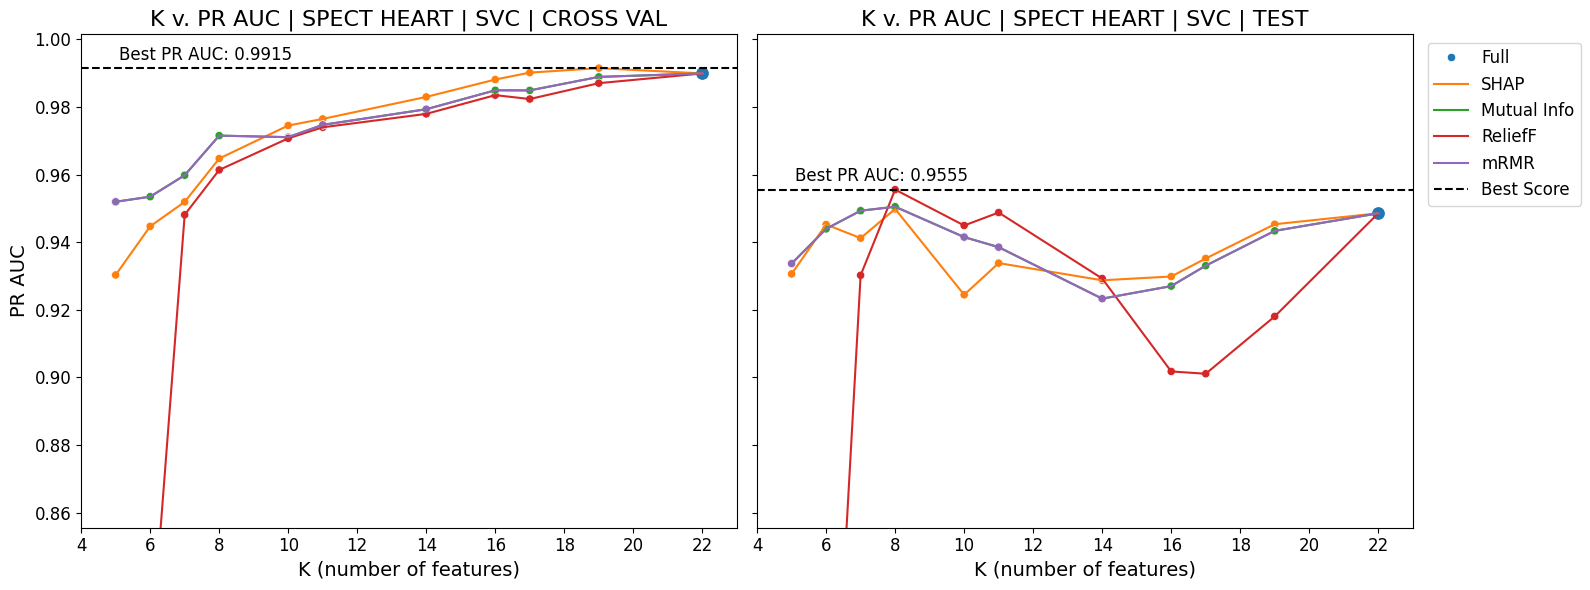

In [18]:
# SHAP goes flat at 16 but may be overfitting, other candidate at 10 or 14 with worse performance
# Mutual/mRMR peaks early at 7 and peaks again at slightly higher performance at 16
# ReliefF goes has a peak at 16, starts going flat around 11
feature_performances[4]

In [19]:
# Sum strategy available at 10, max strategy available at 16
cv_slices[4][cv_slices[4].k.isin([16, 14, 10, 7, 11])]

,dataset,model,selection_type,k,pr_auc,roc_auc,recall,precision,f1,time
1997,uci_spect_heart,svc,sum,10,0.974494,0.911902,0.940998,0.915032,0.927515,9.934084
2000,uci_spect_heart,svc,sum,14,0.982955,0.939055,0.958824,0.947731,0.953025,9.934084
2002,uci_spect_heart,svc,max,16,0.988091,0.960571,0.958824,0.953435,0.955835,9.934084
2006,uci_spect_heart,svc,max,11,0.976448,0.917037,0.947059,0.915508,0.930584,9.934084
2008,uci_spect_heart,svc,max,7,0.951912,0.846712,0.899822,0.895069,0.896409,9.934084
2011,uci_spect_heart,svc,mutual_info,10,0.971050,0.902784,0.929234,0.914654,0.921280,0.026743
2012,uci_spect_heart,svc,relieff,11,0.973965,0.914205,0.905704,0.939015,0.921936,0.013371
2013,uci_spect_heart,svc,mrmr,16,0.984912,0.949573,0.940998,0.952763,0.946702,0.305064
2017,uci_spect_heart,svc,mutual_info,14,0.979312,0.925767,0.929234,0.941502,0.934922,0.026743
2018,uci_spect_heart,svc,mrmr,10,0.971050,0.902784,0.929234,0.914654,0.921280,0.305064


In [20]:
# Best candidates for svc model + full model
best_idx += test_slices[4].iloc[[0]].index.tolist()
best_idx += extract_indices(
    df = test_slices[4],
    k_values = [16, 10, 11, 7, 7]
)

Best selection types per model, lots of styling

TODO: Clean this up and wrap into a function

In [22]:
# Selecting columns, cleaning up column names and values, merging selection types
best_spect_heart = test_stats.iloc[best_idx, :]
best_spect_heart = best_spect_heart[['model', 'selection_type', 'k', 'pr_auc', 'roc_auc', 'f1', 'time']]
best_spect_heart = best_spect_heart[~best_spect_heart.selection_type.str.contains('mutual')]
best_spect_heart.selection_type = best_spect_heart.selection_type.apply(lambda x: x.split('_')[0])
best_spect_heart.selection_type = best_spect_heart.selection_type.replace({'sum': 'shap', 'max': 'shap'})
idx = best_spect_heart.groupby(['model', 'selection_type'])['pr_auc'].idxmax()
best_spect_heart = best_spect_heart.loc[idx]
best_spect_heart.selection_type = best_spect_heart.selection_type.replace(
    {
        'full': 'Full', 'mrmr': 'mRMR/Mutual Info', 'relieff': 'ReliefF', 'shap': 'SHAP'    
    }
)
best_spect_heart.model = best_spect_heart.model.replace(
    {
        'dt': 'Decision Tree', 'logreg': 'Logistic Regression',
        'rf': 'Random Forest', 'xgb': 'XGBoost', 'svc': 'Support Vector Machine'
    }
)
best_spect_heart.insert(3, 'perc_kept', 100 * best_spect_heart.k / 22)
best_spect_heart.columns = ['Model', 'Selection Type', '# Features', '% of Features',
                            'PR AUC', 'ROC AUC', 'F1 Score', 'Time (s)']

In [23]:
# Styling the dataframe
def highlight_max(data):
    attr = "background-color : skyblue; color: black; font-weight: bold"
    
    is_min = data.groupby(level=0).transform('max') == data
    return pd.DataFrame(np.where(is_min, attr, ''),
                        index=data.index, columns=data.columns)

best_spect_heart.set_index(['Model', 'Selection Type']).style.set_table_styles(
    [
        {'selector': 'th.row_heading', 'props': [('text-align', 'center'),
                                                 ('border-top', '1px solid white'),
                                                 ('border-right', '1px solid white')]},
        {'selector': 'th', 'props': [('text-align', 'center'), ('border-bottom', '1px solid white')]},
        {'selector': 'td', 'props': [('text-align', 'center'), ('border-bottom', '1px solid white')]}
    ]
).format(
    {
        '% of Features': '{:.2f}', 'PR AUC': '{:.3f}', 'Time (s)': '{:.3f}',
        'ROC AUC': '{:.3f}', 'F1 Score': '{:.3f}'
    }
).set_properties(width = '100px').apply(highlight_max, axis = None, subset = 'PR AUC')

## Model Hyperparameters

## Model Performance Analysis Across Techniques

## Number of Features Kept and Time Complexity Across Techniques

## Compare Feature Rankings Across Techniques and Model Types

## Percentage of Features Kept Per Dataset For Each SHAP Selection Strategy

In [ ]:
model_data_df = pd.DataFrame.from_dict(model_data, orient = 'index').stack().to_frame()
model_data_df = pd.json_normalize(model_data_df[0]).set_index(model_data_df.index).sort_index()
model_data_df = model_data_df.rename_axis(['dataset', 'subsample'])
model_data_df

In [ ]:
keys = list(model_data['uci_breast_cancer'].keys())
logreg_keys = [key for key in keys if 'logreg' in keys]
dt_keys = [key for key in keys if 'dt' in keys]
rf_keys = [key for key in keys if 'rf' in keys]
xgb_keys = [key for key in keys if 'xgb' in keys]
svc_keys = [key for key in keys if 'svc' in keys]

In [ ]:
df_slice = model_data_df.loc['uci_indian_liver']
df_slice
# df_slice.loc[(df_slice.model_type == 'dt') & (df_slice.sampling_type == 'sum')].sort_values('auprc', ascending = False)

In [ ]:
pd.DataFrame(model_data).map(lambda x: x['auprc']).sort_index()

In [ ]:
test_sets['uci_mushroom'].keys()

## Model Parameters

## Number of Features Kept

## Feature Rankings

## Model Performance